# Importing Libraries

In [6]:
import os
import cv2
from sklearn.utils import shuffle 
import seaborn as sn; sn.set(font_scale=1.2)
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Loading Dataset

In [2]:
class_names = ['Malignant cases', 'Normal cases']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

In [3]:
def load_data():
  
    datasets = ['Train', 'Test']
    output = []
    
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading Train


100%|████████████████████████████████████████████████████████████████████████████████| 428/428 [00:08<00:00, 47.71it/s]


Loading Test


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:02<00:00, 49.45it/s]


# Shuffle Data 

In [7]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

# Exploratory Data Analysis

In [8]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 876
Number of testing examples: 221
Each image is of size: (224, 224)


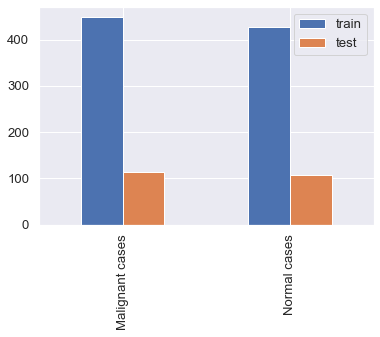

In [9]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train': train_counts,
              'test': test_counts}, 
             index=class_names).plot.bar()

plt.show()

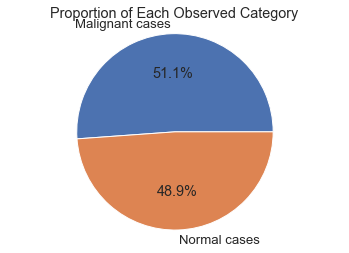

In [10]:
plt.pie(train_counts,
        explode=None, 
        labels=class_names,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Proportion of Each Observed Category')
plt.show()

# Data Preprocessing

In [11]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Deep Learning Architecture

In [12]:
import tensorflow as tf 

In [44]:
model = tensorflow_based_model()

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(28, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [57]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 28)      784       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 28)      0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 344988)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                22079296  
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [58]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=5, validation_split = 0.3, shuffle = True)

Epoch 1/5
10/10 [==============================] - 19s 2s/step - loss: 3.0994 - accuracy: 0.5563 - val_loss: 0.4385 - val_accuracy: 0.8365
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 0.4237 - accuracy: 0.8238 - val_loss: 0.6214 - val_accuracy: 0.6312
Epoch 3/5
10/10 [==============================] - 17s 2s/step - loss: 0.2540 - accuracy: 0.9021 - val_loss: 0.0858 - val_accuracy: 0.9772
Epoch 4/5
10/10 [==============================] - 17s 2s/step - loss: 0.1056 - accuracy: 0.9674 - val_loss: 0.0434 - val_accuracy: 0.9886
Epoch 5/5
10/10 [==============================] - 18s 2s/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9924


In [60]:
test_loss = model.evaluate(test_images, test_labels)

7/7 [==============================] - 2s 225ms/step - loss: 0.0221 - accuracy: 0.9910


In [61]:
test_loss

[0.02214215137064457, 0.9909502267837524]

In [62]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

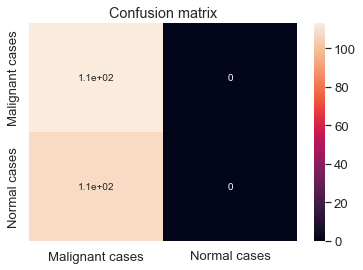

In [63]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [64]:
#Print Classification Report
from sklearn.metrics import classification_report
print('Classification Report')

print(classification_report(test_labels,pred_labels))

Classification Report
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       113
           1       0.00      0.00      0.00       108

    accuracy                           0.51       221
   macro avg       0.26      0.50      0.34       221
weighted avg       0.26      0.51      0.35       221



C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves for CNN model with Processed Dataset')

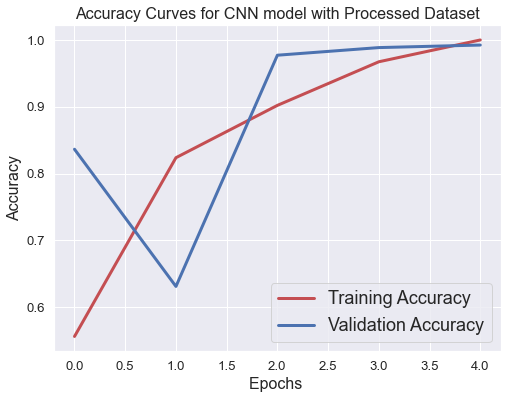

In [65]:
# Accuracy Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['accuracy'],'r',linewidth=3.0)

plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves for CNN model with Processed Dataset',fontsize=16)

Text(0.5, 1.0, 'Loss Curves for CNN model with Processed Dataset')

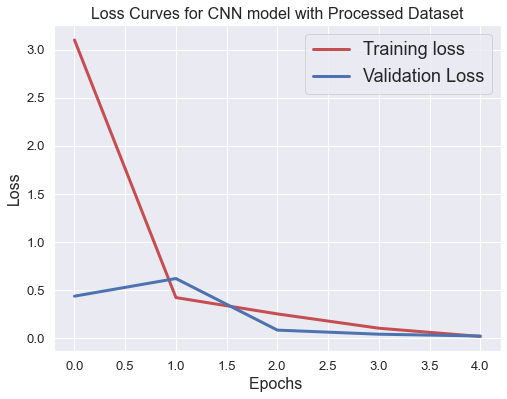

In [66]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['loss'],'r',linewidth=3.0)

plt.plot(history.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves for CNN model with Processed Dataset',fontsize=16)